# 🦜 Bird Species Classification

This notebook builds an end-to-end multi-class image classifier using TenserFlow 2.0 and TenserFlow Hub

---

## 1. Problem Definition
> Identifying the species of a bird given image of a bird.

## 2. Data
The data came from Kaggle's [Bird Species](https://www.kaggle.com/gpiosenka/100-bird-species)

## 3. Features
Data contains 180 different bird species around the world


In [0]:
# #Unzip the uploaded data to google drive
# !unzip '/content/drive/My Drive/ml-data/bird-images.zip' -d '/content/drive/My Drive/ml-data/bird-images/'

## Preparing the tools

In [0]:
# Import TF 2.x
try:
  # %tensorflow_version only exists in colab
  %tensorflow_version 2.x
except Exception:
  pass

In [0]:
# Import necessary tools
import tensorflow as tf
import tensorflow_hub as hub
print('TF version: ',tf.__version__)
print('TF Hub version: ',hub.__version__)

# Check for GPU availability
print('GPU : Available' if tf.config.list_physical_devices('GPU') else 'GPU : Not Available')

TF version:  2.2.0-rc3
TF Hub version:  0.8.0
GPU : Available


In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from matplotlib.image import imread

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## Getting Our Data Ready

In [0]:
import os

my_data_dir = '/content/drive/My Drive/ml-data/bird-images/'

train_path = my_data_dir+'train/'
test_path = my_data_dir+'test/'
valid_path = my_data_dir+'valid/'

In [0]:
os.listdir(train_path)

['ANNAS HUMMINGBIRD',
 'ANHINGA',
 'BALD EAGLE',
 'BALTIMORE ORIOLE',
 'ANTBIRD',
 'ARARIPE MANAKIN',
 'BARN OWL',
 'BANANAQUIT',
 'BARN SWALLOW',
 'BAY-BREASTED WARBLER',
 'BAR-TAILED GODWIT',
 'BLACK SKIMMER',
 'BLACK THROATED WARBLER',
 'BIRD OF PARADISE',
 'BLACK FRANCOLIN',
 'BLACK SWAN',
 'BELTED KINGFISHER',
 'BLUE GROUSE',
 'BLACK-CAPPED CHICKADEE',
 'BLUE HERON',
 'BLACK-NECKED GREBE',
 'BOBOLINK',
 'BLACK VULTURE',
 'BLACKBURNIAM WARBLER',
 'CANARY',
 'CALIFORNIA GULL',
 'CALIFORNIA QUAIL',
 'CALIFORNIA CONDOR',
 'BROWN THRASHER',
 'CACTUS WREN',
 'CAPE MAY WARBLER',
 'CASPIAN TERN',
 'CARMINE BEE-EATER',
 'CINNAMON TEAL',
 'CHARA DE COLLAR',
 'CASSOWARY',
 'COCK OF THE  ROCK',
 'CHIPPING SPARROW',
 'COMMON GRACKLE',
 'COMMON HOUSE MARTIN',
 'COMMON LOON',
 'COCKATOO',
 'CROW',
 'COMMON POORWILL',
 'CRESTED CARACARA',
 'COMMON STARLING',
 'COUCHS KINGBIRD',
 'CRESTED AUKLET',
 'CURL CRESTED ARACURI',
 'CROWNED PIGEON',
 'CUBAN TODY',
 'DARK EYED JUNCO',
 'DOWNY WOODPECKER',
 

In [0]:
len(os.listdir(train_path))

180

In [0]:
os.listdir(train_path+'ALBATROSS')[0]

'053.jpg'

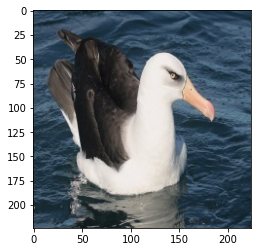

In [0]:
bird_image = train_path+'ALBATROSS'+'/001.jpg'
plt.imshow(imread(bird_image));

In [0]:
unique_species = np.array([name for name in os.listdir(train_path)])
unique_species

array(['ANNAS HUMMINGBIRD', 'ANHINGA', 'BALD EAGLE', 'BALTIMORE ORIOLE',
       'ANTBIRD', 'ARARIPE MANAKIN', 'BARN OWL', 'BANANAQUIT',
       'BARN SWALLOW', 'BAY-BREASTED WARBLER', 'BAR-TAILED GODWIT',
       'BLACK SKIMMER', 'BLACK THROATED WARBLER', 'BIRD OF PARADISE',
       'BLACK FRANCOLIN', 'BLACK SWAN', 'BELTED KINGFISHER',
       'BLUE GROUSE', 'BLACK-CAPPED CHICKADEE', 'BLUE HERON',
       'BLACK-NECKED GREBE', 'BOBOLINK', 'BLACK VULTURE',
       'BLACKBURNIAM WARBLER', 'CANARY', 'CALIFORNIA GULL',
       'CALIFORNIA QUAIL', 'CALIFORNIA CONDOR', 'BROWN THRASHER',
       'CACTUS WREN', 'CAPE MAY WARBLER', 'CASPIAN TERN',
       'CARMINE BEE-EATER', 'CINNAMON TEAL', 'CHARA DE COLLAR',
       'CASSOWARY', 'COCK OF THE  ROCK', 'CHIPPING SPARROW',
       'COMMON GRACKLE', 'COMMON HOUSE MARTIN', 'COMMON LOON', 'COCKATOO',
       'CROW', 'COMMON POORWILL', 'CRESTED CARACARA', 'COMMON STARLING',
       'COUCHS KINGBIRD', 'CRESTED AUKLET', 'CURL CRESTED ARACURI',
       'CROWNED PIGE

In [0]:
len(unique_species)

180

### Filenames & Labels

In [0]:
from os import walk
from os.path import join



def imageFileGenrator(path):
    '''
    Takes the path and returns list containing 
    filename and coressponding label
    path: path of the directory containing images
    '''
    filenames = []
    labels = []
        
    for dirs in os.listdir(path):
      for files in os.listdir(path+dirs):
        filenames.append(path+dirs+'/'+files)
        labels.append(dirs)

    return filenames, labels

In [0]:
filenames, labels = imageFileGenrator(path=train_path)

In [0]:
len(filenames), len(labels)

(24497, 24497)

In [0]:
data = pd.DataFrame({'images':filenames, 'labels':labels})
data.head()

,images,labels
0,/content/drive/My Drive/ml-data/bird-images/tr...,ANNAS HUMMINGBIRD
1,/content/drive/My Drive/ml-data/bird-images/tr...,ANNAS HUMMINGBIRD
2,/content/drive/My Drive/ml-data/bird-images/tr...,ANNAS HUMMINGBIRD
3,/content/drive/My Drive/ml-data/bird-images/tr...,ANNAS HUMMINGBIRD
4,/content/drive/My Drive/ml-data/bird-images/tr...,ANNAS HUMMINGBIRD


### Shuffling the data

In [0]:
data = data.sample(frac=1)
data.index = np.arange(0, len(data))
data.head()

,images,labels
0,/content/drive/My Drive/ml-data/bird-images/tr...,BLACKBURNIAM WARBLER
1,/content/drive/My Drive/ml-data/bird-images/tr...,BLACK-CAPPED CHICKADEE
2,/content/drive/My Drive/ml-data/bird-images/tr...,CARMINE BEE-EATER
3,/content/drive/My Drive/ml-data/bird-images/tr...,BLACK SKIMMER
4,/content/drive/My Drive/ml-data/bird-images/tr...,MALLARD DUCK


In [0]:
data.tail()

,images,labels
24492,/content/drive/My Drive/ml-data/bird-images/tr...,GREEN JAY
24493,/content/drive/My Drive/ml-data/bird-images/tr...,RUFUOS MOTMOT
24494,/content/drive/My Drive/ml-data/bird-images/tr...,COCKATOO
24495,/content/drive/My Drive/ml-data/bird-images/tr...,PINK ROBIN
24496,/content/drive/My Drive/ml-data/bird-images/tr...,CROW


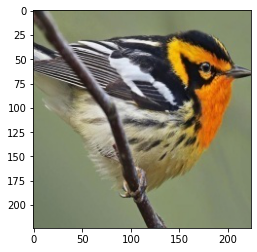

In [0]:
plt.imshow(imread(data.images[0]));

### Turn every label into boolean array


In [0]:
boolean_labels = [species == unique_species for species in data.labels]
boolean_labels[:2]

[array([False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False,  True, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
      

In [0]:
len(boolean_labels), len(data.labels)

(24497, 24497)

## Preprocessing Images

In [0]:
image = imread(data.images[1])
image.shape

(224, 224, 3)

In [0]:
image

array([[[155, 145, 110],
        [155, 145, 110],
        [155, 145, 110],
        ...,
        [154, 139, 116],
        [153, 138, 115],
        [151, 137, 111]],

       [[156, 146, 111],
        [155, 145, 110],
        [155, 145, 110],
        ...,
        [156, 142, 116],
        [155, 141, 115],
        [154, 140, 114]],

       [[156, 145, 113],
        [156, 145, 113],
        [155, 144, 112],
        ...,
        [157, 143, 117],
        [158, 142, 117],
        [157, 141, 116]],

       ...,

       [[133, 123,  88],
        [133, 123,  88],
        [133, 122,  90],
        ...,
        [150, 130, 105],
        [151, 131, 106],
        [150, 130, 106]],

       [[133, 123,  88],
        [133, 123,  88],
        [133, 123,  88],
        ...,
        [149, 129, 104],
        [150, 130, 106],
        [149, 131, 107]],

       [[133, 123,  88],
        [133, 123,  88],
        [133, 123,  88],
        ...,
        [152, 132, 107],
        [150, 130, 106],
        [146, 128, 104]]

### Normalizing

Converting from 0-255 to 0-1 makes our computing effcient

In [0]:
tf.image.convert_image_dtype(image, tf.float32)

<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
array([[[0.60784316, 0.5686275 , 0.43137258],
        [0.60784316, 0.5686275 , 0.43137258],
        [0.60784316, 0.5686275 , 0.43137258],
        ...,
        [0.6039216 , 0.54509807, 0.454902  ],
        [0.6       , 0.5411765 , 0.45098042],
        [0.5921569 , 0.5372549 , 0.43529415]],

       [[0.6117647 , 0.57254905, 0.43529415],
        [0.60784316, 0.5686275 , 0.43137258],
        [0.60784316, 0.5686275 , 0.43137258],
        ...,
        [0.6117647 , 0.5568628 , 0.454902  ],
        [0.60784316, 0.5529412 , 0.45098042],
        [0.6039216 , 0.54901963, 0.44705886]],

       [[0.6117647 , 0.5686275 , 0.4431373 ],
        [0.6117647 , 0.5686275 , 0.4431373 ],
        [0.60784316, 0.5647059 , 0.43921572],
        ...,
        [0.6156863 , 0.56078434, 0.45882356],
        [0.61960787, 0.5568628 , 0.45882356],
        [0.6156863 , 0.5529412 , 0.454902  ]],

       ...,

       [[0.52156866, 0.48235297, 0.34509805],
        [0.52

### Creating Train Sets

#### We're going to start of experimenting with ~1000 images and increase as needed.bold text

In [0]:
# Set number of images to use for experimenting
NUM_IMAGES = 1000 #@param {type:'slider', min:1000, max:10000}

In [0]:
X_train = data.images[:NUM_IMAGES]
y_train = boolean_labels[:NUM_IMAGES]

In [0]:
len(X_train), len(y_train)

(1000, 1000)

In [0]:
X_train[100], y_train[100]

('/content/drive/My Drive/ml-data/bird-images/train/EASTERN TOWEE/048.jpg',
 array([False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False,  True, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
 

In [0]:
unique_species[np.argmax(y_train[100])]

'EASTERN TOWEE'

### Creating Validation Set

In [0]:
X_val, y_val = imageFileGenrator(path=valid_path)

In [0]:
X_val[:2]

['/content/drive/My Drive/ml-data/bird-images/valid/BLACK FRANCOLIN/4.jpg',
 '/content/drive/My Drive/ml-data/bird-images/valid/BLACK FRANCOLIN/2.jpg']

In [0]:
# Turn every label into boolean array
y_val = [species == unique_species for species in y_val]
y_val[:2]

[array([False, False, False, False, False, False, False, False, False,
        False, False, False, False, False,  True, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
      

In [0]:
len(X_val), len(y_val)

(900, 900)

### Creating Test Set

In [0]:
X_test, y_test = imageFileGenrator(path=test_path)

In [0]:
X_test[:2]

['/content/drive/My Drive/ml-data/bird-images/test/CRESTED CARACARA/1.jpg',
 '/content/drive/My Drive/ml-data/bird-images/test/CRESTED CARACARA/3.jpg']

In [0]:
# Turn every label into boolean array
y_test = [species == unique_species for species in y_test]
y_val[:2]

[array([False, False, False, False, False, False, False, False, False,
        False, False, False, False, False,  True, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
      

In [0]:
len(X_test), len(y_test)

(900, 900)

## Preprocessing Images (turning images into Tensors)

To preprocess our images into tensors we're going to write a function which does a few things

1. Take an image filepath as input
2. Use TensorFlow to read the file and save it to variable, `image`
3. Turn our `image` (a jpg) into Tensors
4. Normalize our `image` ( convert color channel values from 0-255 to 0-1 )
4. Resize the `image` to be shape of (224, 224)
5. Return the modefied `image`

Before we do, let's see what importing an image looks like

In [0]:
# Define image size
IMG_SIZE = 224

# Create a function for preprocessing images
def process_image(image_path, img_size=IMG_SIZE):
  '''
  Takes the image file path and turns the image into Tensors
  '''

  # Read in image file
  image = tf.io.read_file(image_path)

  # Turn the jpg image into numerical Tensor with 3 color channels (Red, Green, Blue)
  image = tf.image.decode_jpeg(image, channels=3)

  # Convert the color channel values from 0-255 to 0-1 values (Normalization)
  image = tf.image.convert_image_dtype(image, tf.float32)

  # Resize the image to desired value (224, 2224) square
  image = tf.image.resize(image, size=[IMG_SIZE, IMG_SIZE])

  # return the image
  return image

## Turning our data into batches


In [0]:
# Create a simple function to return a tuple (image, label)

def get_image_label(image_path, label):
  '''
  Takes an image file path and the associated label,
  proccess the image and returns a tuple of (image, label)
  '''
  image = process_image(image_path)

  return image, label

Now we've got a way to turn our data into tuples of Tensors in the form: `(image, label)`, let's make a function to turn all of our data (`X` & `y`) into batches!

In [0]:
# Define the batch size i.e. 32
BATCH_SIZE = 32

# Create a function to turn data into batches
def create_data_batches(X, y=None, batch_size=BATCH_SIZE, test_data=False):
  '''
  Create batches of data out of image (X) and label (y) pairs.
   Also accepts test data as input (no labels)
  '''
  # tf.constant - Creates a constant tensor from a tensor-like object.

  # If the data is test dataset, we probably don't have labels
  if test_data:
    print('Creating test data batches...')
    data = tf.data.Dataset.from_tensor_slices((tf.constant(X))) # this says, pass me some Tensors and I'll create dataset out of that
    data_batch = data.map(process_image).batch(BATCH_SIZE)
    return data_batch

  else:
    print('Creating data batches....')
    # Turn filepaths and labels into tensors
    data = tf.data.Dataset.from_tensor_slices((tf.constant(X), # filepaths
                                               tf.constant(y))) # labels
    # Shuffling pathnames and labels before mapping image processor function us faster than shuffling
    # data = data.shuffle(buffer_size=len(X))

    # Creates (image, label) tuples (this also turns the image path into a preprocessed image)
    # And turn the training data into batches
    data_batch = data.map(get_image_label).batch(batch_size)
  return data_batch

In [0]:
train_data = create_data_batches(X_train, y_train)

Creating data batches....


In [0]:
# Check out the different attributes of our data batches
train_data.element_spec

(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
 TensorSpec(shape=(None, 180), dtype=tf.bool, name=None))

## Visualizing Data Batches

In [0]:
# Create a function for viewing images in data batch

def show_25_images(images, labels):
  '''
  Displays a plot of 25 images and their labels from a data batch
  '''

  # Setup the figure 
  plt.figure(figsize=(10,10))

  # Loop through 25 (for displaying 25 images)
  for i in range(25):
    # Create subplots ( 5 rows, 5 columns )
    ax = plt.subplot(5, 5, i+1) # 5 rows 5 columns and index

    # Display image
    plt.imshow(images[i])

    # Add the image label as title
    plt.title(unique_species[labels[i].argmax()], color='black')

    # Turn the grid lines off
    plt.axis('off')
    


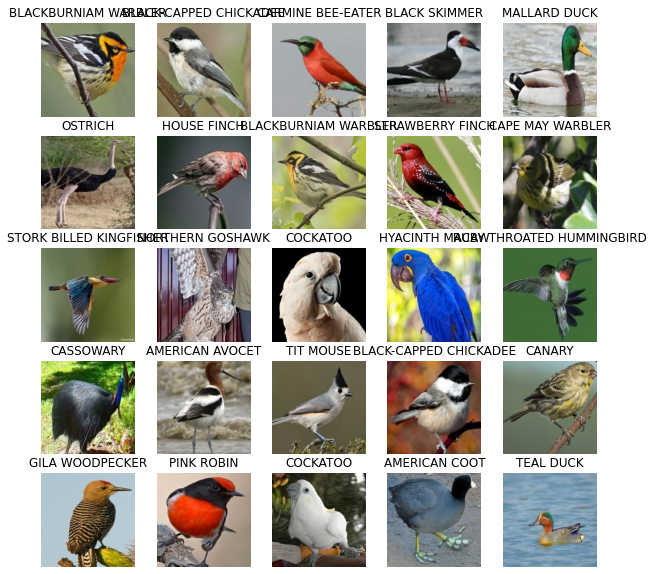

In [0]:
train_images, train_labels = next(train_data.as_numpy_iterator())
show_25_images(train_images, train_labels)

## Modelling


Before we build a model, there are few things we need to define
* The input shape ( our images shape, in the form of Tensors ) of our model.
* The output shape ( image labels, in the form of Tensors ) of our model.
* The URL of the model we want to use from [TensorFlow Hub](https://tfhub.dev/s?module-type=image-classification).

In [0]:
IMG_SIZE

224

In [0]:
# Setup input shape to the model
INPUT_SHAPE = [None, IMG_SIZE, IMG_SIZE, 3] # batch, height, width, color channels

# Setup output shape of our model
OUTPUT_SHAPE = len(unique_species)

# Setup model URL from TensorFlow Hub
MODEL_URL = 'https://tfhub.dev/google/imagenet/inception_v2/classification/4'

Now we've got out inputs, output and model ready to go let's put them together into a Keras deep learning model.


In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
# Create a function which builds a Keras model

# we are using image size 224, 224 bcoz that is the size that inception model trained on

def create_model(input_shape=INPUT_SHAPE, output_shape=OUTPUT_SHAPE, model_url= MODEL_URL):
  print('Building model with: ',model_url)

  # Setup the model layers / Instatiated model
  model = tf.keras.Sequential()

  # mobilnetV2 layer 
  model.add( hub.KerasLayer(model_url))
 
  # ouput layer 
  model.add(Dense(180, activation='softmax'))

# softmax - converts the patterns between 0-1
# If we work with binary classification the activation function is "Sigmoid"


  # Compile the model
  model.compile(
      # loss is measure of how well the model is guessing, the higher the loss worse the prediction.
      # lower the loss the better is model is leanrning the patterns
      loss = tf.keras.losses.CategoricalCrossentropy(), # for binary classification use BinaryCrossentropy()

      # Optimizer - tells how model can improved their gueses witch each epoch
      optimizer = tf.keras.optimizers.Adam(),
      
      # Metric - how well our model is predicting the correct labels
      metrics = ['accuracy']
  )

  # Build the model
  model.build(input_shape)

  return model

In [0]:
model = create_model()
model.summary()

Building model with:  https://tfhub.dev/google/imagenet/inception_v2/classification/4
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer (KerasLayer)     multiple                  11199137  
_________________________________________________________________
dense (Dense)                multiple                  180360    
Total params: 11,379,497
Trainable params: 180,360
Non-trainable params: 11,199,137
_________________________________________________________________


## Creating Callbacks

### Tensorboard

In [0]:
# Load TensorBoard notebook extension
%load_ext tensorboard

In [0]:
import datetime

# Create a function to build a TensorBoard callback
def create_tensorboard_callback():
  # Create a log directory for storing TensorBoard logs
  logdir = os.path.join('/content/drive/My Drive/Bird-species-classification/logs',
                # Make it so the logs get tracked whenever we run an experiment
                        datetime.datetime.now().strftime('%Y/%m/%d-%H:%M:%S'))
  
  return tf.keras.callbacks.TensorBoard(logdir)

### Early Stopping

In [0]:
from tensorflow.keras.callbacks import EarlyStopping

# Create early stopping callback

early_stopping = EarlyStopping(monitor='accuracy',
                               patience=3)

## Creating a function to test model

In [0]:
# Check to make sure we're still running on GPU
print('GPU: Available' if tf.config.list_physical_devices('GPU') else 'GPU: Not Available')

GPU: Available


In [0]:
# Build a function train and return trained model
def train_model():
  '''
  Trains a given model and returns the trained version
  '''

  # Create a model
  model = create_model()

  # Create new TensorBoard session everytime we train a model
  tensorboard = create_tensorboard_callback()

  # Fit the model to the data passing it the callback we created
  model.fit(x=train_data,
            epochs=100,
            callbacks=[tensorboard, early_stopping])
  
  # return the fitted model
  return model

### Training on 1000 images

In [0]:
# Fit the model to data
model = train_model()

Building model with:  https://tfhub.dev/google/imagenet/inception_v2/classification/4
Epoch 1/100
32/32 [==============================] - 555s 17s/step - loss: 4.5615 - accuracy: 0.1320
Epoch 2/100
32/32 [==============================] - 2s 75ms/step - loss: 1.8271 - accuracy: 0.6710
Epoch 3/100
32/32 [==============================] - 2s 76ms/step - loss: 0.8667 - accuracy: 0.9170
Epoch 4/100
32/32 [==============================] - 2s 70ms/step - loss: 0.4740 - accuracy: 0.9760
Epoch 5/100
32/32 [==============================] - 2s 68ms/step - loss: 0.2965 - accuracy: 0.9930
Epoch 6/100
32/32 [==============================] - 2s 69ms/step - loss: 0.2043 - accuracy: 0.9990
Epoch 7/100
32/32 [==============================] - 2s 68ms/step - loss: 0.1506 - accuracy: 0.9990
Epoch 8/100
32/32 [==============================] - 2s 68ms/step - loss: 0.1166 - accuracy: 1.0000
Epoch 9/100
32/32 [==============================] - 2s 68ms/step - loss: 0.0937 - accuracy: 1.0000
Epoch 10/100


In [0]:
predictions = model.predict(train_data)
predictions[:10]

array([[9.8585115e-06, 1.9862542e-05, 5.0044337e-06, ..., 5.5971763e-05,
        7.9759420e-04, 1.3865015e-03],
       [2.1850433e-06, 4.9642080e-07, 1.3896638e-06, ..., 9.9806009e-08,
        1.9190486e-07, 8.6049442e-07],
       [4.9105734e-06, 4.9209179e-05, 9.1582142e-06, ..., 1.7519277e-06,
        1.9524941e-06, 9.2235841e-06],
       ...,
       [1.6393660e-05, 1.7276872e-05, 2.3554057e-06, ..., 7.5375603e-05,
        7.0953625e-04, 2.4142112e-03],
       [1.0955428e-06, 1.7476398e-06, 5.9770639e-07, ..., 2.5345560e-05,
        2.5181402e-04, 1.2788440e-05],
       [1.5226927e-06, 3.3762542e-06, 1.0294132e-05, ..., 5.0153849e-06,
        1.1231729e-03, 3.0938198e-04]], dtype=float32)

In [0]:
predictions.shape # 800 rows, 180 columns in each row

(1000, 180)

In [0]:
# Turn probability into their respective label (easier to understand)

def get_pred_label(prediction_probability):
  '''
  Turns an array of predictions probabilities into label
  '''
  return unique_species[np.argmax(prediction_probability)]

# Get a predicted label based on an array of prediction probabilities
pred_label = get_pred_label(predictions[534])
pred_label

'ELEGANT TROGON'

In [0]:
data.labels[534]

'ELEGANT TROGON'

## Training a model on full data

In [0]:
X = np.array(data.images)
y = boolean_labels

In [0]:
len(X), len(y)

(24497, 24497)

In [0]:
X[:10]

array(['/content/drive/My Drive/ml-data/bird-images/train/BLACKBURNIAM WARBLER/109.jpg',
       '/content/drive/My Drive/ml-data/bird-images/train/BLACK-CAPPED CHICKADEE/093.jpg',
       '/content/drive/My Drive/ml-data/bird-images/train/CARMINE BEE-EATER/061.jpg',
       '/content/drive/My Drive/ml-data/bird-images/train/BLACK SKIMMER/084.jpg',
       '/content/drive/My Drive/ml-data/bird-images/train/MALLARD DUCK/010.jpg',
       '/content/drive/My Drive/ml-data/bird-images/train/OSTRICH/77.jpg',
       '/content/drive/My Drive/ml-data/bird-images/train/HOUSE FINCH/019.jpg',
       '/content/drive/My Drive/ml-data/bird-images/train/BLACKBURNIAM WARBLER/131.jpg',
       '/content/drive/My Drive/ml-data/bird-images/train/STRAWBERRY FINCH/058.jpg',
       '/content/drive/My Drive/ml-data/bird-images/train/CAPE MAY WARBLER/103.jpg'],
      dtype=object)

In [0]:
y[:1]

[array([False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False,  True, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
      

In [0]:
# Create a databatch with full data set
full_data = create_data_batches(X,y)

Creating data batches....


In [0]:
full_data

<BatchDataset shapes: ((None, 224, 224, 3), (None, 180)), types: (tf.float32, tf.bool)>

In [0]:
# Create a model for full model
full_model = create_model()

Building model with:  https://tfhub.dev/google/imagenet/inception_v2/classification/4


In [0]:
# Create full model callbacks
full_model_tensorboard = create_tensorboard_callback()

# No validation set when training on all the data, so we can't monitor validation accuracy
full_model_early_stopping = tf.keras.callbacks.EarlyStopping(monitor='accuracy',
                                                             patience=3)


In [0]:
# Fit the full model to the full data
full_model.fit(x=full_data,
               epochs=100,
               callbacks=[full_model_tensorboard, full_model_early_stopping])

Epoch 1/100
  2/766 [..............................] - ETA: 2:46 - loss: 5.5629 - accuracy: 0.0000e+00WARNING:tensorflow:Method (on_train_batch_end) is slow compared to the batch update (0.194367). Check your callbacks.


766/766 [==============================] - 12985s 17s/step - loss: 1.0129 - accuracy: 0.7657
Epoch 2/100
766/766 [==============================] - 58s 75ms/step - loss: 0.3405 - accuracy: 0.9107
Epoch 3/100
766/766 [==============================] - 57s 74ms/step - loss: 0.2244 - accuracy: 0.9446
Epoch 4/100
766/766 [==============================] - 57s 74ms/step - loss: 0.1596 - accuracy: 0.9634
Epoch 5/100
766/766 [==============================] - 57s 74ms/step - loss: 0.1192 - accuracy: 0.9753
Epoch 6/100
766/766 [==============================] - 57s 75ms/step - loss: 0.0912 - accuracy: 0.9823
Epoch 7/100
766/766 [==============================] - 57s 75ms/step - loss: 0.0716 - accuracy: 0.9872
Epoch 8/100
766/766 [==============================] - 57s 74ms/step - loss: 0.0572 - accuracy: 0.9911
Epoch 9/100
766/766 [==============================] - 57s 74ms/step - loss: 0.0464 - accuracy: 0.9929
Epoch 10/100
766/766 [==============================] - 57s 75ms/step - loss: 0.037

## Saving a Model

In [0]:
# Create a function to save a model

def save_model(model, suffix=None):
  '''
  Saves a given model in a models directory and appends a suffix (string)
  '''

  # Create a model directory pathname with current time
  modeldir = os.path.join('/content/drive/My Drive/Bird-species-classification/models/',
                          datetime.datetime.now().strftime('%Y%m%d-%H%M%s'))
  
  model_path = modeldir + '_' + suffix + '.h5' # save format of model
  print(f'Saving model to: {model_path}...')
  model.save(model_path)

  return model_path



In [0]:
# Save our model trained on 1000 images
save_model(full_model, suffix='full-images-inception-4')

Saving model to: /content/drive/My Drive/Bird-species-classification/models/20200426-11041587899060_full-images-inception-4.h5...


'/content/drive/My Drive/Bird-species-classification/models/20200426-11041587899060_full-images-inception-4.h5'

## Converting Model into TFlite

In [0]:
converter = tf.lite.TFLiteConverter.from_keras_model(full_model)
tflite_model = converter.convert()
file = open( '/content/drive/My Drive/Bird-species-classification/models/fullmodel_2.tflite' , 'wb' ) 
file.write( tflite_model )

45466980

## Evaluation

In [0]:
losses = pd.DataFrame(full_model.history.history)

In [0]:
losses

,loss,accuracy
0,1.012856,0.765726
1,0.340465,0.910683
2,0.224377,0.944565
3,0.159611,0.963383
4,0.119247,0.975262
5,0.091234,0.982284
6,0.071582,0.987223
7,0.057154,0.991060
8,0.046421,0.992897
9,0.037807,0.994489


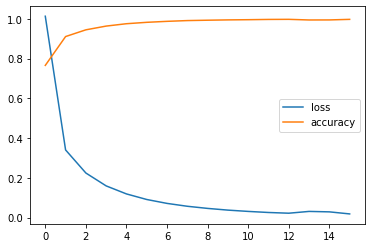

In [0]:
losses.plot()

## Making Predictions on Test Data

In [0]:
X_test[:10]

['/content/drive/My Drive/ml-data/bird-images/test/CRESTED CARACARA/1.jpg',
 '/content/drive/My Drive/ml-data/bird-images/test/CRESTED CARACARA/3.jpg',
 '/content/drive/My Drive/ml-data/bird-images/test/CRESTED CARACARA/5.jpg',
 '/content/drive/My Drive/ml-data/bird-images/test/CRESTED CARACARA/4.jpg',
 '/content/drive/My Drive/ml-data/bird-images/test/CRESTED CARACARA/2.jpg',
 '/content/drive/My Drive/ml-data/bird-images/test/EMPEROR PENGUIN/5.jpg',
 '/content/drive/My Drive/ml-data/bird-images/test/EMPEROR PENGUIN/4.jpg',
 '/content/drive/My Drive/ml-data/bird-images/test/EMPEROR PENGUIN/2.jpg',
 '/content/drive/My Drive/ml-data/bird-images/test/EMPEROR PENGUIN/1.jpg',
 '/content/drive/My Drive/ml-data/bird-images/test/EMPEROR PENGUIN/3.jpg']

In [0]:
y_test[:1]

[array([False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False,  True,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
      

In [0]:
len(X_test), len(y_test)

(900, 900)

In [0]:
# Create test data batch
test_data = create_data_batches(X_test,test_data=True)
test_data

Creating test data batches...


<BatchDataset shapes: (None, 224, 224, 3), types: tf.float32>

In [0]:
# Make predictions on the test data
test_preds = full_model.predict(test_data)
test_preds[:10]

In [0]:
test_preds.shape

In [0]:
# Get custom image predictions labels
test_preds_labels =[get_pred_label(test_preds[i]) for i in range(len(test_preds))]

In [0]:
test_preds_labels[:10]